In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
sys.path.append('python_files')
sys.path.append('data')
import student_debt_wrapper
import animated_linear_2class_demo
import animated_nonlinear_2class_demo

# Mathematical Optimization 101

In this notebook we give an overview of mathematical optimization - which is the set of tools used to tune machine learning models properly.  

These notes are part of the supplementary material to the textbook Machine Learning Refined (Cambridge University Press), visit <http://www.mlrefined.com>
for free chapter downloads and tutorials, and [our Amazon site here](https://www.amazon.com/Machine-Learning-Refined-Foundations-Applications/dp/1107123526/ref=sr_1_1?ie=UTF8&qid=1471024084&sr=8-1&keywords=machine+learning+refined) for details regarding a hard copy of the text.

# 2.   Mathematical optimization

Every learning problem has parameters that must be tuned properly to ensure optimal learning. For example, there are two parameters that must be properly tuned in the case linear regression (with one dimensional input): the slope and intercept of the linear model.  These two parameters are tune by forming a 'cost function' - a continuous function in both parameters - that measures how well the linear model fits a dataset given a value for its slope and intercept.  The proper tuning of these parameters via the cost function corresponds geometrically to finding the values for the parameters that make the cost function as small as possible or, in other words, *minimize* the cost function.  In the image below - taken from [MLRefined] - you can see how choosing a set of parameters higher on the cost function results in a corresponding linear fit that is poorer than the one corresponding to parameters at the lowest point on the cost surface.

<img src="images/bigpicture_regression_optimization.png" width=500 height=250/>


This same idea holds true for regression with higher dimensional input, as  as well as classification where we must properly tune the intercept and normal vector to the fitting hyperplane.  Again, the parameters minimizing the cost function provide the better classification result.  This is illustrated for classification below - again taken from [1].

<img src="images/bigpicture_classification_optimization.png" width=500 height=250/>

The tuning of these parameters is accomplished by a set of tools known collectively as mathematical optimization. Mathematical optimization is the formal study of how to properly minimize cost functions and is used not only in machine learning, but reasons in a variety of other fields including operations, logistics, and physics.

So, in summary, **Mathematical Optimization** is the method by which we determine the proper parameters for machine learning models.  When viewed geometrically the pursuit of proper parameters is also the search for the lowest point - or minimum - of a machine learning model's associated cost function.

### Example 1:  Mathematical Optimization and Linear regression

It seems like everyday we see articles from major news outlets describing the issue of student debt in the U.S.  Its rapid growth over the past several years has presented a very serious problem.  Using the tools of machine learning, and **linear regression** in particular, we can actually quanity this problem quite well.  Moreover using linear regression we can make accurate predictions about how student debt will grow in the near future.

We can do this by examining a dataset such as the one shown here taken from the New York Federal reserve.  This data  shows the total amount of student debt held in the U.S. in trillions of dollars between the years 2004 and 2014, meausred quarterly.

<img src="images/student_debt_img.png" width=300 height=100/>

In order to make an accurate prediction about how much student debt will be held in the U.S. in, say, the year 2018 it is very natural to try a fit a line to such a dataset, and then use that trend line to make future predictions about total student debt in the U.S.  We illustrate a trendline fit to the dataset below.

<img src="images/student_debt_w_trendline.png" width=300 height=100/>


If the line is fit correctly, then all we have to do is plug in the year 2018 into the fit line, and examine the corresponding output.  As we can see, if the current trend in student debt growth seen over this time period continues to the year 2018, we can expect there to be a total of over 1.3 trillion dollars in student debt.

This is a typical example of a very common machine learning task called **linear regression**, and in order to fit this line correctly (or, in other words, to learn the correct parameters - i.e., the slope and intercept of the line) we use **mathematical optimization**.  

The next cell containing python code plots two panels - in the left we show the student debt data, and in the right is illustrated its assocated cost function.  The cost function (in the right panel) is defined over the parameter space consisting of all possible slopes in one dimension, and vertical-intercept values in the other.  By finding the lowest point on this cost function we determine the optimal parameters for a best fit line to this dataset.  

To learn about the technical details regarding the cost function for linear regression [see Chapter 3 of our book available for free download here](http://mlrefined.wix.com/home-page#!download-sample-chapters/cjg9). 

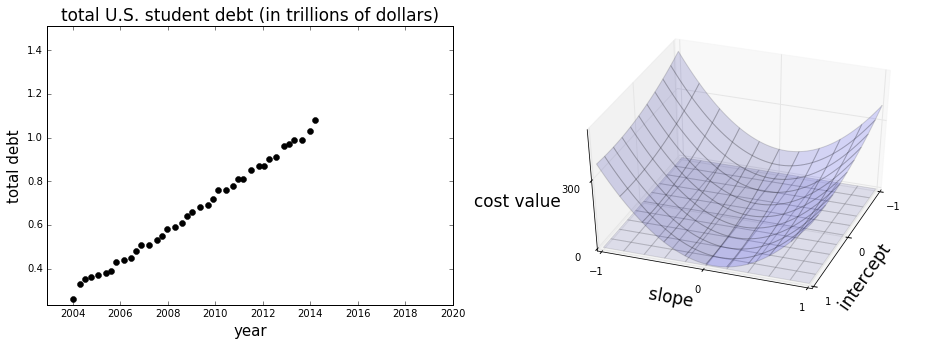

In [9]:
# load in the data
x,y = student_debt_wrapper.load_data()    # this method simply loads the data

# make a two-panel figure - the right figure needs to be equipped to illustrate 3d objects
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# show the student debt dataset as well as the assocated linear regression cost function
student_debt_wrapper.plot_pts(x,y,ax1)           # plots the data in the left panel
student_debt_wrapper.make_cost_surface(x,y,ax2)                # plots the cost function in the right panel

In the next cell find the lowest point or *minimum* of this cost function using the mathematical optimization scheme known as **gradient descent**.  This is an iterative procedure that - beginning at a random point on the cost function - takes sequential steps downward until the minimum is reached.  To read more about the technical details of this algorithm [see Chapter 2 of our book available for free download here](http://mlrefined.wix.com/home-page#!download-sample-chapters/cjg9).

After pressing enter in this next cell the procedure will begin, with each of its steps plotted in both panels.  In particular

- in the Right panel - at step the procedure takes us downward towards the minimum of the cost function.  This downward stepping towards a minimum at each iteration of the procedure is characteristic of most mathematical optimization algorithms.


- in the Left panel - at each step of the procedure we plot the line to the student debt data having the associated slope and vertical intercept.  Notice that the lower we go on the cost function, the better the slope and vertical intercept of the line becomes.

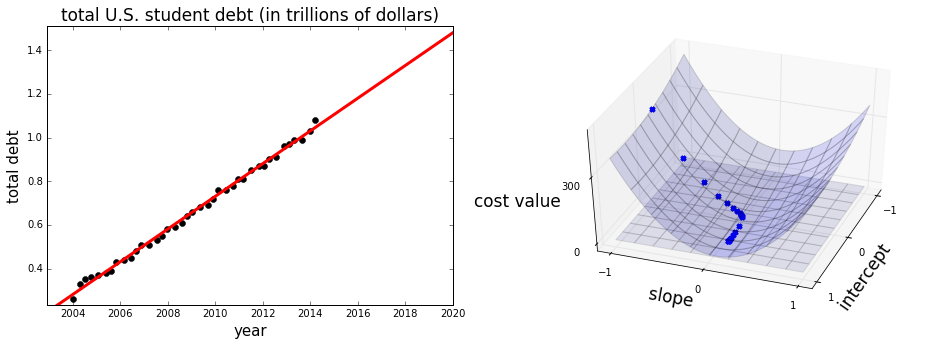

In [10]:
# run the gradient descent procedure - make sure you have ran the previous cell first to load the data
param_history = student_debt_wrapper.linear_regression_gradient_descent(x,y,max_its = 400)

# animate the paramter history from our gradient descent run
student_debt_wrapper.animate(x,y,param_history)

### Example 2: linear classification

In this example we mirror the previous one only here we look at the problem of *linear classification*.  Using a toy dataset consisting of two classes - red points and blue points - we apply the same **gradient descent** algorithm to find the minimum of a cost function, and thus the proper parameters for a linear classifier.

In the next cell we plot the the two-class dataset for visualization purposes.

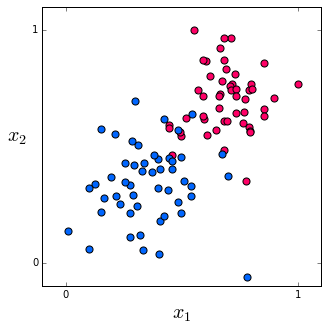

In [2]:
# load a dataset
x,y = animated_linear_2class_demo.load_data(dataset = 'datasets/2class_data_overlap.csv')

# animated_linear_2class_demo_v2.py is a collection of customized plotting functions - no magic in here
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(111)
animated_linear_2class_demo.plot_pts(x,y,ax1,dim = 2)

Now - we want to find a line that properly separates the two classes of points as best as possible.  To do this we will using so-called *logistic regression*.  You can find more technical details about logistic regression (as well as other linear classifiers like *support vector machines*) [in Chapter 4 of our book which you may download for free here](http://mlrefined.wix.com/home-page#!download-sample-chapters/cjg9).

In the next cell we apply the gradient descent algorithm to properly determine parameters for the line separating the red and blue classes.  The setup is quite similar to the example with linear regression where

- in the Right panel: the cost function value at step of the procedure is plotted.  Notice here we do not illustrate the cost function surface itself - as it has too many inputs to be nicely visualized - but simply the value of the cost function at each step of the procedure.  This sort of plot is commonly used in practice to ensure that algorithms like gradient descent are converging properly to a minimum of the cost function.


- in the Left panel: at each step of the procedure we show the separating line and color each region according to how the classifier will label each point in the area.  Notice how the lower we go on the cost function, the better the classifier separates the red and blue classes. 

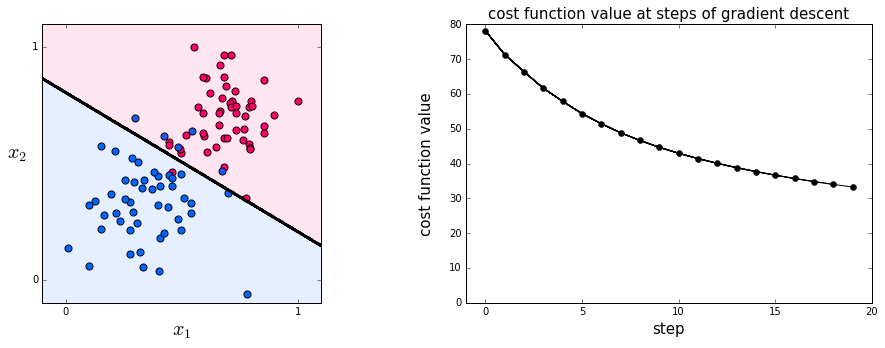

In [3]:
# run gradient descent and store each step for animation
w_history = animated_linear_2class_demo.logistic_regression(x,y,max_its = 100)

# animate each step of the gradient descent procedure
animated_linear_2class_demo.animate_linear_classification(x,y,w_history)

Notice that because the two classes overlap, no line can ever separate them perfectly.  Nonetheless, a line still works quite well here.

### Example 3: nonlinear classification

In many instances in practice - e.g., face detection as discussed in the Intro to Brief Intro to Machine Learning notebook - two classes of data are not very well separated by a line at all.  In the next cell we show an a toy example of such a two-class dataset

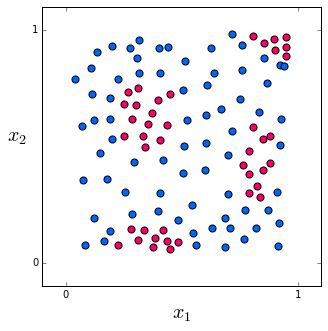

In [15]:
# load a dataset
x,y = animated_linear_2class_demo.load_data(dataset = 'datasets/4eggs_data.csv')

# animated_linear_2class_demo_v2.py is a collection of customized plotting functions - no magic in here
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(111)
animated_linear_2class_demo.plot_pts(x,y,ax1,dim = 2)

In such an instance one must use proper feature design ([see Chapter 4 of our textbook available for free online here](http://mlrefined.wix.com/home-page#!download-sample-chapters/cjg9)) and / or a nonlinear classification scheme like neural networks or kernelized models (see e.g., Chapters 5 - 7 of our textbook). 

In the cell that follows we will use the Newton's method procedure ([see Chapter 2 of our text available for free download here](http://mlrefined.wix.com/home-page#!download-sample-chapters/cjg9) to fit a nonlinear classifier to the dataset shown in the previous cell.  

As with Examples 1 and 2 - the right panel of the next cell's output will plot the cost function value at each step of the procedure, while the left panel shows the associated ever improving nonlinear classifier as the algorithm edges nearer and nearer to the minimum of the function.

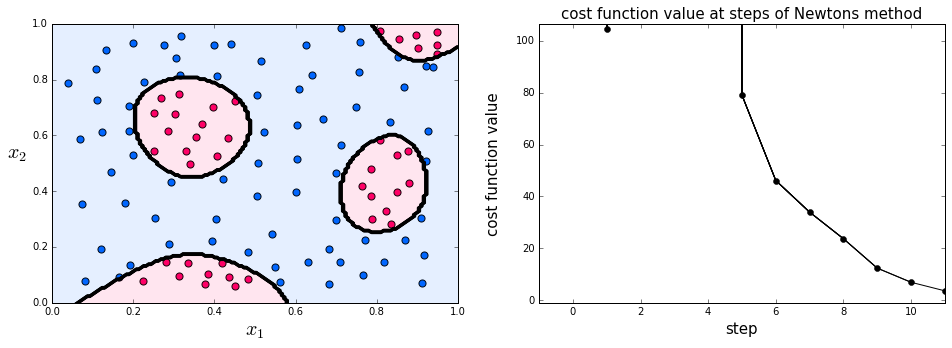

In [14]:
# run the Newton's method algorithm to perform nonlinear classification on a toy dataset
animated_nonlinear_2class_demo.run(dataset = 'datasets/4eggs_data.csv',feat_type = 'poly', degree = 4)

##  1.1  Our first foray into mathematical optimization

NOTE: review basic calculus, linear algebra, numpy / matplotlib, etc., prior to going over this section

So, we want to minimize, or equivalently find a \emph{minimum }point of, a (cost) function. You may remember that such a task is actually a fundamental subject of basic calculus, which we will now review.  For now lets simplify notation a bit and discuss this concept for a general function $g\left(w\right)$ which take in a scalar input
$w$ (we'll generalize to vector input functions afterwards).

Remember that geometrically speaking the derivative of $g\left(w\right)$ at a particular point $v$, which we will write as $ $$g^{\prime}\left(v\right)$, is the *slope* of the line tangent to that point.   

#### Example: a simple polynomial with its derivative

Take the function $g(w) = w^2$.  The derivative here is then just $g'(w) = 2w$.  

Let's plot the function along with a few examples of tangent lines generated by its derivative at the points $w=0$, $w = -1$, and $w = 1$.

In [103]:
# import matplotlib and numpy - the next line lets us plot inline in the notebook
%matplotlib inline   
import matplotlib.pyplot as plt
import numpy as np

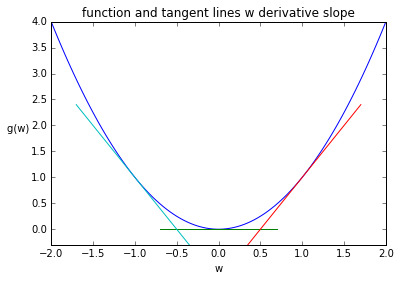

In [104]:
# evaluate our function over input range, or at single points
def make_function(w_eval):
    g = w_eval**2
    return g

# evaluate the derivative of our function over an input range, or at single points
def make_derivative(w_eval):
    g_prime = 2*w_eval
    return g_prime

# create a tangent line at a given input with slope = derivative
def make_tangent_line(w_eval):
    # compute function value
    g = make_function(w_eval)
    
    # compute the derivative
    g_prime = make_derivative(w_eval)
    
    # generate line with this slope - center on input point
    w = np.linspace(w_eval - 0.7,w_eval + 0.7,100)
    h = g + g_prime*(w - w_eval)
    plt.plot(w,h)

# create function over the range [-2,2]
w = np.linspace(-2,2,100)
g = make_function(w)

# plot function
plt.plot(w,g)
plt.xlabel('w')
plt.ylabel('g(w)     ',rotation = 0)
plt.title('function and tangent lines w derivative slope')
plt.ylim(-0.3,4)

# compute tangent lines at points = 0, 1, and -1 and plot
make_tangent_line(0)
make_tangent_line(1)
make_tangent_line(-1)

Now, examining any differentiable $g\left(w\right)$ we can easily conclude that minima are naturally located where the slope of the linear approximation is zero, i.e., at points $w=v$ where $g^{\prime}\left(v\right)=0$. This gives us a simple looking rule for identifying minima of a scalar input function $g$ called the *first order condition* - just find a point $v$ satisfying $g^{\prime}\left(v\right)=0$. 

However closer examination shows that often other non-minima points also satisfy this rule.  If we just look more closely at the wiggly function $g$ in the picture below (taken from [Watt]) we can see that the other points satisfying this condition include maxima and saddle points of a function as well.  Notice that any minimum taking on the lowest possible value of the function is also referred to as a *global minimum*.

<img src="images/nonconvex.png" width=500 height=250/>

Collectively these minima, maxima, and saddle points are often referred to as *stationary* or *critical points*. 

> the *first order condition* gives all stationary points by solving for all input $v$ where $g'(v) =0$, however a stationary point for some general function can be a minimum, maximum,or saddle point 

Below is a picture (taken from [1]) of a special kind of function that we will see throughout the course - a *convex function* - along its critical point marked.  These functions are special because any critical is always a minimum and - in fact - a *global minimum* as well.  The more general type of function illustrated above - with its many different kinds of critical points - is referred to as a *nonconvex function*.

> all stationary points of a convex function are global minima

<img src="images/convex.png" width=500 height=250/>

Let's look at a few examples where we can compute critical points 'by hand'.

#### Example:  $g\left(w\right)=w^{2}$  

A simple quadratic or parabola.  Lets plot the function over a wide range of values. 

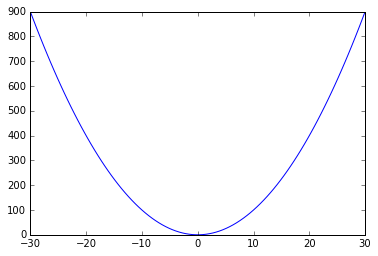

In [105]:
x = np.linspace(-30,30,100)
y = x**2
plt.plot(x,y)

We can see from the picture that it has a unique global minimum at $w=0$. Let's see how the first order condition finds this point. 

Setting the derivative to zero we have $g^{\prime}\left(w\right)=2w=0$, and the only value for $w$ making this true is indeed $w=0$.

#### Example: $g\left(w\right)=w^{3}$  

A simple cubic, lets plot it first.  

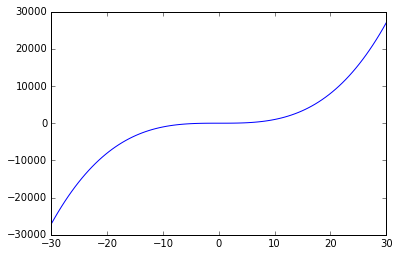

In [106]:
x = np.linspace(-30,30,100)
y = x**3
plt.plot(x,y)

Visually we can see that it goes off to positive and negative infinity, and has one saddle point at $w=0$. Lets check that the first order condition gives us this too. 

We have that $g^{\prime}\left(w\right)=3w^{2}=0$
and, again, the only value of $w$ satisfying this is $w=0$

#### Exercise: $g\left(w\right)=\mbox{sin}\left(w\right)$  

A sine wave - this will have lots of stationary points - let's plot it!

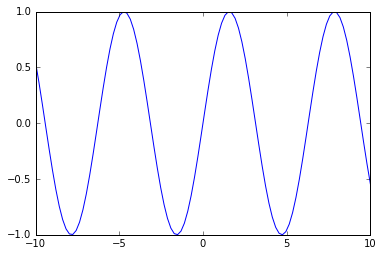

In [107]:
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y)

##  1.2  Our first foray - the vector input case

Everything we have said so far holds precisely for the vector input case as well. The first order condition still recovers all stationary points of a vector-input function, and for convex functions these are all global minima.  The only thing that changes are the formulae, and then only slightly.  A vector input function $g(\mathbf{w})$ is simply one that takesn in a vector of $N$ parameters 

\begin{equation}
\mathbf{w}=\left[\begin{array}{c}
w_{1}\\
w_{2}\\
\vdots\\
w_{N}
\end{array}\right]
\end{equation}

The derivative then generalizes in the case of vector input functions $g\left(\mathbf{w}\right)$ to the "gradient", or an $N\times1$ vector of partial derivatives of $g\left(\mathbf{w}\right)$ as 

\begin{equation}
\nabla g\left(\mathbf{w}\right)=\left[\begin{array}{c}
\frac{\partial}{\partial w_{1}}g\\
\frac{\partial}{\partial w_{2}}g\\
\vdots\\
\frac{\partial}{\partial w_{N}}g
\end{array}\right].
\end{equation}

In complete analogy to the one dimensional input case where we found stationary points by finding those $v$ where $g^{\prime}\left(v\right)=0$, the first order condition for recovering stationary points of $g\left(\mathbf{w}\right)$
has us find those $\mathbf{v}$ that have zero gradient, i.e., $\nabla g\left(\mathbf{v}\right)=\mathbf{0}_{N\times1}$.
Notice how indeed the condition $\nabla g\left(\mathbf{v}\right)=\mathbf{0}_{N\times1}$
reduces to $g^{\prime}\left(v\right)=0$ when $N=1$. However notice that in the case where $N>1$ this first order condition is a *system* of $N$ equations i.e., 

\begin{equation}
\begin{array}{c}
\frac{\partial}{\partial w_{1}}g=0,\\
\frac{\partial}{\partial w_{2}}g=0,\\
\vdots\\
\frac{\partial}{\partial w_{N}}g=0.
\end{array}
\end{equation}

The catch here, which will lead us to discuss numerical methods for minimizing cost functions, is that typically these systems of equations cannot be solved in closed form (using 'pencil and paper').  One important exception to this rule is the quadratic function, which we looked at in one input dimension earlier.

####  Example (advanced): quadratic function with multi-dimensional input

Earlier we looked at the one dimesnional input quadratic function $g(w) = w^2$.  More generally such a quadratic takes the form  

\begin{equation}
g(w) = \frac{1}{2}qw^2 + rw +s
\end{equation}

where a, b, and c are constants.  Notice we can write this equivlaently as $g(w) = \frac{1}{2}wqw + rw +s$.  The higher dimensional analog, where the function takes in vector-valued input $\bf{w}$, is similarly defined as 

\begin{equation}
g(\mathbf{w}) = \frac{1}{2}\mathbf{w}^T\mathbf{Q}\mathbf{w} + \mathbf{r}^T\mathbf{w} + s
\end{equation}

Here $\mathbf{Q}$ is an $N\times N$ symmetric matrix 

\begin{equation}
\mathbf{Q}=\left[\begin{array}{cccc}
q_{1,1} & q_{1,2} & \cdots & q_{1,N}\\
q_{2,1} & q_{2,2}\\
\vdots &  & \ddots\\
q_{N,1} &  &  & q_{N,N}
\end{array}\right]
\end{equation}

that is $q_{i,j} = q_{j,i}$ for all $i$ and $j$, $\mathbf{r}$ is an $N$ dimensional vector, and $s$ is a constant.


Computing the gradient - one can do this by computing one partial at a time and combining the results - gives the gradient as 

\begin{equation}
\nabla g\left(\mathbf{w}\right) = \mathbf{Q}\mathbf{w} + \mathbf{r} = \mathbf{0}
\end{equation}

And setting this equal to zero and solving for $\mathbf{w}$ gives a linear system

\begin{equation}
\mathbf{Q}\mathbf{w} = -\mathbf{r} 
\end{equation}

which can be solved!

## References

[1]  Jeremy Watt, Reza Borhani, and Aggelos. Katsaggelos. Machine Learning Refined. Cam- bridge University Press, 2016.

[2]  Reggie Panaligan and Andrea Chen. Quantifying movie magic with google search. Google
Whitepaper:Industry Perspectives and User Insights, 2013.

[3]  David G.Â McCullough. The Wright Brothers. Simon & Schuster, 2015.